In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP.models import (summarize, poly)
from pygam import LinearGAM, s
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("Abalone/train.csv")
test=pd.read_csv("Abalone/test.csv")

In [3]:
train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [4]:
train["Rings"].describe()

count    90615.000000
mean         9.696794
std          3.176221
min          1.000000
25%          8.000000
50%          9.000000
75%         11.000000
max         29.000000
Name: Rings, dtype: float64

In [5]:
label=LabelEncoder()
label_=label.fit_transform(train["Sex"])
train["Sex"]=label_

In [6]:
label_=label.fit_transform(test["Sex"])
test["Sex"]=label_

In [7]:
train.corr()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
id,1.000000,-0.003553,0.004724,0.004290,0.005916,0.005228,0.004203,0.004878,0.005887,0.000938
Sex,-0.003553,1.000000,-0.020774,-0.021648,-0.029732,-0.027787,-0.017512,-0.032769,-0.033301,-0.026308
Length,0.004724,-0.020774,1.000000,0.989732,0.916094,0.931449,0.909609,0.913134,0.911073,0.623786
Diameter,0.004290,-0.021648,0.989732,1.000000,0.919618,0.933848,0.908466,0.914668,0.917871,0.636832
Height,0.005916,-0.029732,0.916094,0.919618,1.000000,0.902344,0.861769,0.886132,0.904019,0.665772
Whole weight,0.005228,-0.027787,0.931449,0.933848,0.902344,1.000000,0.971249,0.974319,0.964201,0.617274
Whole weight.1,0.004203,-0.017512,0.909609,0.908466,0.861769,0.971249,1.000000,0.949227,0.911800,0.515067
Whole weight.2,0.004878,-0.032769,0.913134,0.914668,0.886132,0.974319,0.949227,1.000000,0.937069,0.588954
Shell weight,0.005887,-0.033301,0.911073,0.917871,0.904019,0.964201,0.911800,0.937069,1.000000,0.694766
Rings,0.000938,-0.026308,0.623786,0.636832,0.665772,0.617274,0.515067,0.588954,0.694766,1.000000


<Axes: xlabel='Sex', ylabel='Rings'>

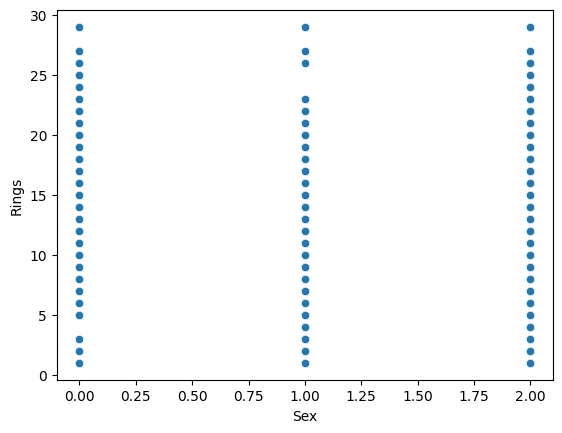

In [8]:
sns.scatterplot(x='Sex', y='Rings', data=train)

In [9]:
X = train["Sex"].values.reshape(-1, 1)
Y = train["Rings"].values

for degree in [1, 2, 3]:
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, Y)
    Y_pred = model.predict(X_poly)
    mse = mean_squared_error(Y, Y_pred)
    print(f"Degree {degree} MSE: {mse:.4f}")

Degree 1 MSE: 10.0813
Degree 2 MSE: 7.3698
Degree 3 MSE: 7.3698


<Axes: xlabel='Length', ylabel='Rings'>

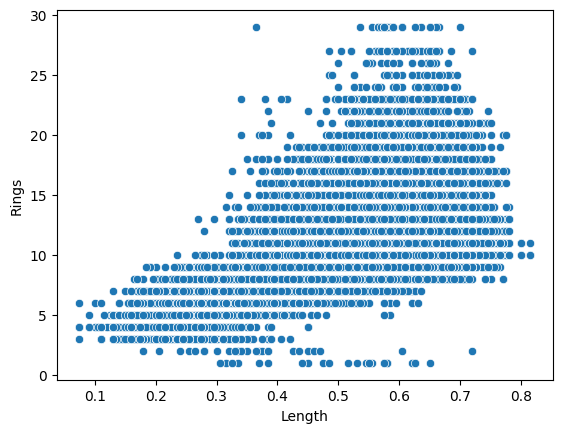

In [10]:
sns.scatterplot(x='Length', y='Rings', data=train)

In [11]:
X = train["Length"].values.reshape(-1, 1)
Y = train["Rings"].values

for degree in [1, 2, 3]:
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, Y)
    Y_pred = model.predict(X_poly)
    mse = mean_squared_error(Y, Y_pred)
    print(f"Degree {degree} MSE: {mse:.4f}")

Degree 1 MSE: 6.1628
Degree 2 MSE: 6.1552
Degree 3 MSE: 6.1182


<Axes: xlabel='Diameter', ylabel='Rings'>

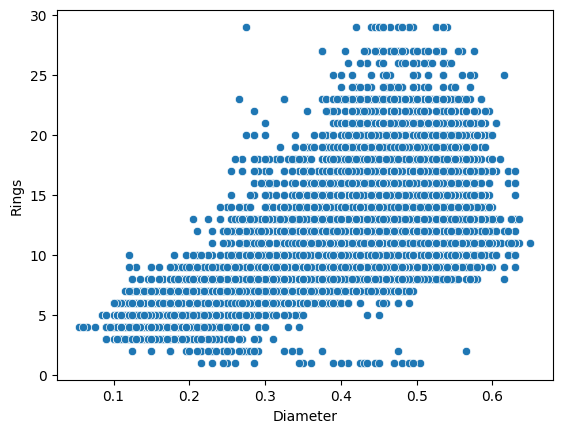

In [12]:
sns.scatterplot(x='Diameter', y='Rings', data=train)

In [13]:
X = train["Diameter"].values.reshape(-1, 1)
Y = train["Rings"].values

for degree in [1, 2, 3]:
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, Y)
    Y_pred = model.predict(X_poly)
    mse = mean_squared_error(Y, Y_pred)
    print(f"Degree {degree} MSE: {mse:.4f}")

Degree 1 MSE: 5.9969
Degree 2 MSE: 5.9947
Degree 3 MSE: 5.9800


<Axes: xlabel='Height', ylabel='Rings'>

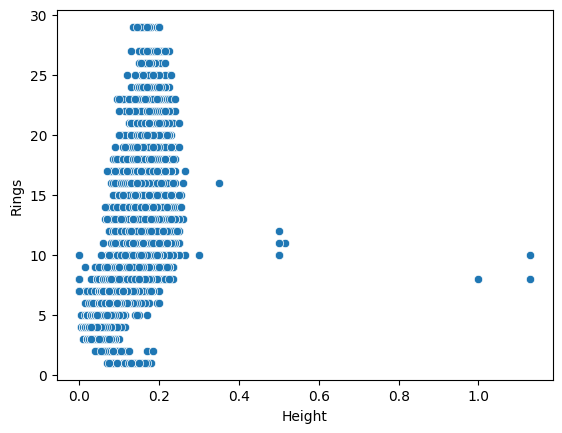

In [14]:
sns.scatterplot(x='Height', y='Rings', data=train)

In [15]:
X = train["Height"].values.reshape(-1, 1)
Y = train["Rings"].values

for degree in [1, 2, 3]:
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, Y)
    Y_pred = model.predict(X_poly)
    mse = mean_squared_error(Y, Y_pred)
    print(f"Degree {degree} MSE: {mse:.4f}")

Degree 1 MSE: 5.6166
Degree 2 MSE: 5.4975
Degree 3 MSE: 5.4975


<Axes: xlabel='Whole weight', ylabel='Rings'>

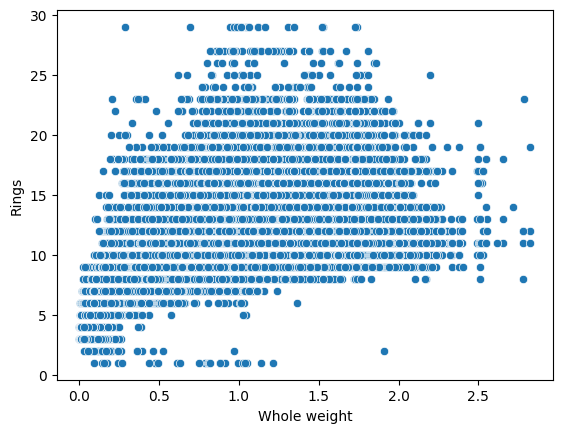

In [16]:
sns.scatterplot(x='Whole weight', y='Rings', data=train)

In [17]:
X = train["Whole weight"].values.reshape(-1, 1)
Y = train["Rings"].values

for degree in [1, 2, 3]:
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, Y)
    Y_pred = model.predict(X_poly)
    mse = mean_squared_error(Y, Y_pred)
    print(f"Degree {degree} MSE: {mse:.4f}")

Degree 1 MSE: 6.2444
Degree 2 MSE: 5.8175
Degree 3 MSE: 5.7996


<Axes: xlabel='Whole weight.1', ylabel='Rings'>

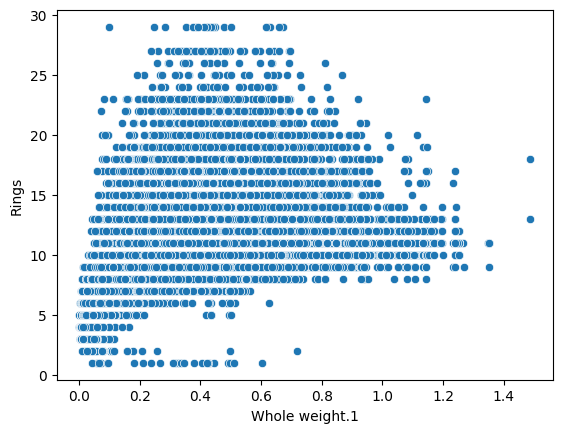

In [18]:
sns.scatterplot(x='Whole weight.1', y='Rings', data=train)

In [19]:
X = train["Whole weight.1"].values.reshape(-1, 1)
Y = train["Rings"].values

for degree in [1, 2, 3]:
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, Y)
    Y_pred = model.predict(X_poly)
    mse = mean_squared_error(Y, Y_pred)
    print(f"Degree {degree} MSE: {mse:.4f}")

Degree 1 MSE: 7.4119
Degree 2 MSE: 6.6753
Degree 3 MSE: 6.5417


<Axes: xlabel='Whole weight.2', ylabel='Rings'>

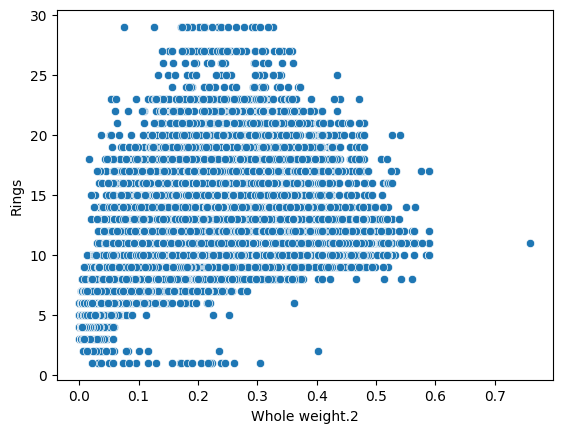

In [20]:
sns.scatterplot(x='Whole weight.2', y='Rings', data=train)

In [21]:
X = train["Whole weight.2"].values.reshape(-1, 1)
Y = train["Rings"].values

for degree in [1, 2, 3]:
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, Y)
    Y_pred = model.predict(X_poly)
    mse = mean_squared_error(Y, Y_pred)
    print(f"Degree {degree} MSE: {mse:.4f}")

Degree 1 MSE: 6.5890
Degree 2 MSE: 6.0209
Degree 3 MSE: 5.9872


In [22]:
train.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

<Axes: xlabel='Shell weight', ylabel='Rings'>

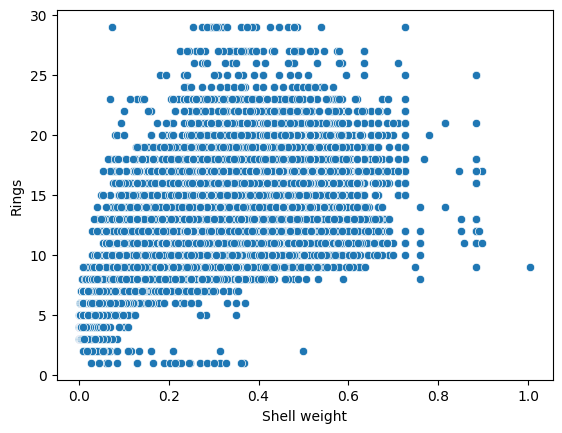

In [23]:
sns.scatterplot(x='Shell weight', y='Rings', data=train)

## Train and Predict Using GAM

In [24]:
x_data=train.iloc[:, 1:-1]
y_data=train["Rings"]

In [25]:
gam=LinearGAM(s(0, lam=0.6)).fit(x_data, y_data)

In [26]:
gam

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, terms=s(0) + intercept, tol=0.0001, 
   verbose=False)

In [27]:
pred=[int(round(i,0)) for i in np.maximum(gam.predict(test.iloc[:,1:]),0)]

In [28]:
test["Rings"]=pred

In [29]:
submission_data=test[["id","Rings"]]
submission_data.to_csv("Abalone_Submission5.csv", index=False)

## Train and Predict Using Polynomial Regression

In [30]:
poly = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly.fit_transform(x_data)

In [31]:
M = sm.OLS(y_data, X_poly).fit()
summarize(M)

,coef,std err,t,P>|t|
x1,6.7640,1.246,5.428,0.000
x2,-38.8421,53.209,-0.730,0.465
x3,-26.2844,73.418,-0.358,0.720
x4,8.1934,94.435,0.087,0.931
x5,-4.4240,41.808,-0.106,0.916
...,...,...,...,...
x490,-3298.9234,831.921,-3.965,0.000
x491,-1789.6952,1436.468,-1.246,0.213
x492,-1211.1602,1145.781,-1.057,0.290
x493,410.6793,486.868,0.844,0.399


In [32]:
test.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,90615,2,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,11
1,90616,2,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,11
2,90617,2,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,11
3,90618,2,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,11
4,90619,1,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,8


In [33]:
test2=test.drop("Rings", axis=1)

In [34]:
X_poly_test = poly.transform(test2.iloc[:,1:])

In [35]:
pred2=[int(round(i,0)) for i in np.maximum(M.predict(X_poly_test),0)]

In [36]:
test2["Rings"]=pred2
submission_data=test2[["id","Rings"]]
submission_data.to_csv("Abalone_Submission6.csv", index=False)